In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 81

In [3]:
data = pd.read_csv('card_transdata.csv')

In [4]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

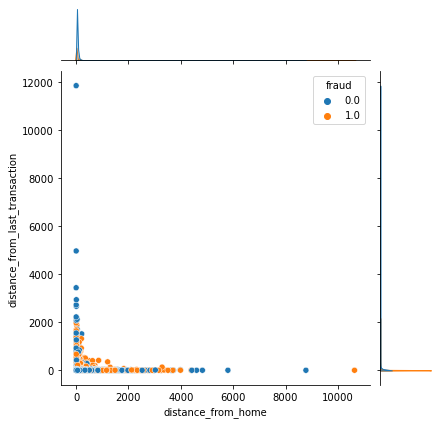

In [9]:
sns.jointplot(data = data, 
              x = 'distance_from_home', 
              y = 'distance_from_last_transaction', 
              hue = 'fraud')
plt.show()

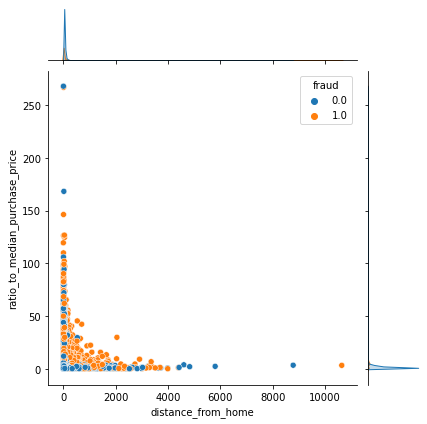

In [10]:
sns.jointplot(data = data, 
              x = 'distance_from_home', 
              y = 'ratio_to_median_purchase_price', 
              hue = 'fraud')
plt.show()

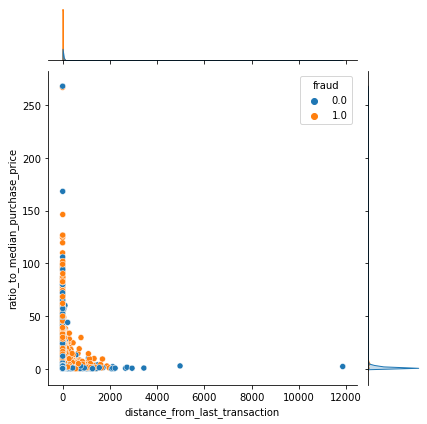

In [11]:
sns.jointplot(data = data, 
              x = 'distance_from_last_transaction', 
              y = 'ratio_to_median_purchase_price', 
              hue = 'fraud')
plt.show()

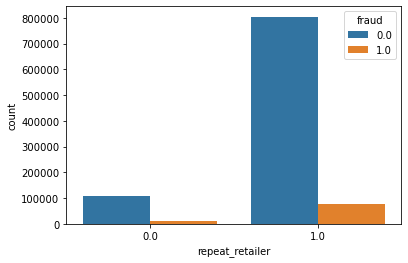

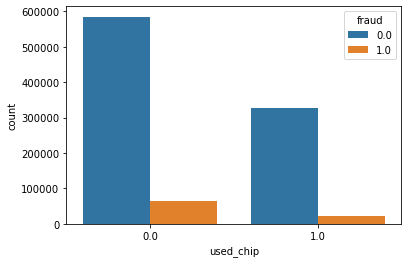

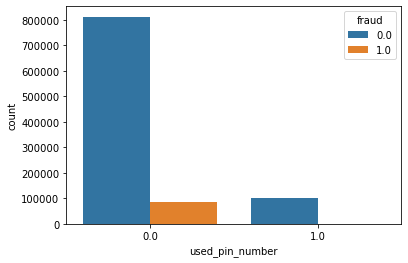

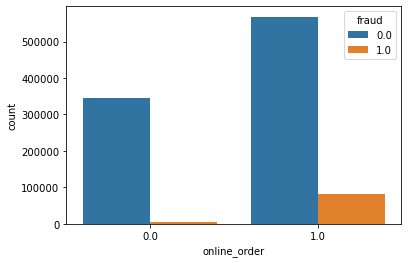

In [12]:
bin_cols = ['repeat_retailer','used_chip','used_pin_number','online_order']
for col in bin_cols:
    sns.countplot(data[col], hue = data.fraud)
    plt.show()

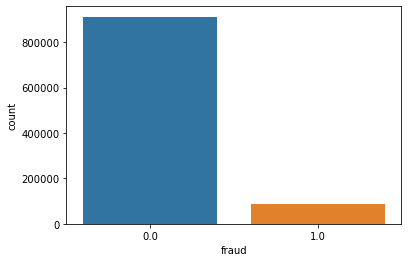

fraud
0.0    912597
1.0     87403
dtype: int64


In [13]:
sns.countplot(data['fraud'])
plt.show()
print(data.groupby('fraud').size().sort_values(ascending=False))

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ctransformer = ColumnTransformer([
    ('scaler', StandardScaler(),[
        'distance_from_home',
        'distance_from_last_transaction',
        'ratio_to_median_purchase_price']),
    ('encoder', OneHotEncoder(drop='if_binary'),[
        'repeat_retailer',
        'used_chip',
        'used_pin_number',
        'online_order']),
],
    remainder='passthrough')

ctransformed = ctransformer.fit_transform(data)
ctransformed

array([[ 0.47788202, -0.18284892,  0.04349141, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24160679, -0.18809398, -0.18930045, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3293694 , -0.16373307, -0.49881185, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.36264968, -0.13790278, -0.57369398, ...,  0.        ,
         1.        ,  0.        ],
       [-0.34209827, -0.1855234 , -0.48162807, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.48140344, -0.18257921, -0.51338354, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
X = data.drop(['fraud'], axis=1) 
y = data['fraud']

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state = seed)
pipeline = make_pipeline(ctransformer, model)
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(pipeline, X, y, cv = kfold)
y_pred = cross_val_predict(pipeline, X, y, cv = kfold)
print(str(results.mean()))
print(confusion_matrix(y, y_pred))

KeyboardInterrupt: 